In [11]:
# https://realpython.com/k-means-clustering-python/

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [12]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42,
)

In [13]:
# Standardization scales/shifts the values for each numerical feature in the dataset so that the features have a mean of 0 and stdev of 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
# Choosing k, elbow method
# Run several k-means, increment k in each iteration, record SSE
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

# A list holds the SSE (sum of squared error) values for each k
sse = []
for k in range(1, 11):
    # https://realpython.com/iterate-through-dictionary-python/#using-the-dictionary-unpacking-operator
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

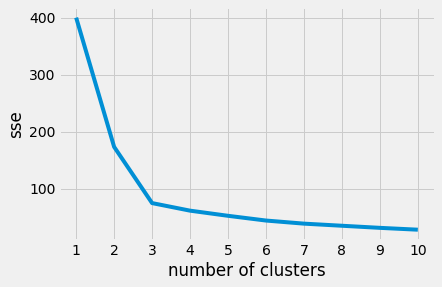

In [15]:
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.show()

In [16]:
# If it's not obvious what the elbow point is, use kneed
kl = KneeLocator(
    range(1, 11), sse, curve='convex', direction='decreasing'
)
kl.elbow

3

In [17]:
# Choosing k, silhouette coefficient method
silhouette_coefficients = []

# Note: start at 2 clusters for sc
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

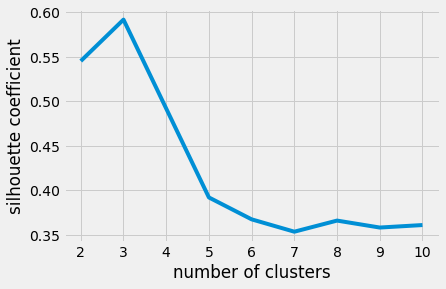

In [18]:
plt.style.use('fivethirtyeight')
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficient')
plt.show()